In [3]:
#This example uses Python 2.7 and the python-request library.
#This is already given to the user on the website
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'20',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '25b8f9cc-dcbe-48e2-8e93-b87b02a8a5e3',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2024-11-20T12:14:47.934Z', 'error_code': 0, 'error_message': None, 'elapsed': 12, 'credit_count': 1, 'notice': None, 'total_count': 10106}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11805, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [5]:
type(data)

dict

In [7]:
import pandas as pd
pd.set_option('display.max_columns', None) #This allows the user to see all the columns
pd.set_option('display.max_rows', None) #This allows the user to see all the rows


In [9]:
#Adding time stamps to our df
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11805,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.978493e+07,1.978493e+07,False,NaN,1,NaN,NaN,None,2024-11-20T12:12:00.000Z,93419.401082,7.725132e+10,10.0730,0.256415,1.586830,6.607335,36.939959,48.042776,52.554792,1.848296e+12,59.4752,1.961807e+12,None,2024-11-20T12:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-20 07:14:55.022861
1,1027,Ethereum,ETH,ethereum,9573,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204263e+08,1.204263e+08,True,NaN,2,NaN,NaN,None,2024-11-20T12:12:00.000Z,3089.432390,2.804033e+10,-21.2117,-0.221612,-1.484107,-2.441037,14.082430,20.925730,17.150587,3.720490e+11,11.9719,3.720490e+11,None,2024-11-20T12:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-20 07:14:55.022861
2,825,Tether USDt,USDT,tether,104411,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.287671e+11,1.309757e+11,True,NaN,3,NaN,NaN,None,2024-11-20T12:13:00.000Z,1.000940,1.465055e+11,-1.7155,-0.007879,0.035618,-0.035777,0.160362,0.071108,0.062355,1.288881e+11,4.1457,1.310988e+11,None,2024-11-20T12:13:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-20 07:14:55.022861
3,5426,Solana,SOL,solana,787,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.746371e+08,5.886798e+08,True,NaN,4,NaN,NaN,None,2024-11-20T12:13:00.000Z,236.520999,6.608643e+09,-8.6863,0.314358,-4.055237,13.922437,41.768319,60.842376,63.902396,1.122616e+11,3.6124,1.392351e+11,None,2024-11-20T12:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-20 07:14:55.022861
4,1839,BNB,BNB,bnb,2286,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440107e+08,1.440107e+08,False,NaN,5,NaN,NaN,None,2024-11-20T12:13:00.000Z,610.966723,2.077456e+09,-2.4275,-0.239053,-1.464969,0.125642,0.313446,5.308824,4.919904,8.798576e+10,2.8301,8.798576e+10,None,2024-11-20T12:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-20 07:14:55.022861
5,52,XRP,XRP,xrp,1433,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.693124e+10,9.998701e+10,False,NaN,6,NaN,NaN,None,2024-11-20T12:13:00.000Z,1.138910,6.108486e+09,-12.0749,0.989217,3.083374,69.895996,105.485773,95.012302,89.743698,6.483956e+10,2.0864,1.138910e+11,None,2024-11-20T12:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-20 07:14:55.022861
6,74,Dogecoin,DOGE,dogecoin,1104,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.468692e+11,1.468692e+11,True,NaN,7,NaN,NaN,None,2024-11-20T12:12:00.000Z,0.387779,1.161189e+10,26.6800,0.146713,0.503216,0.803446,168.708973,265.341041,264.425370,5.695278e+10,1.8326,5.695278e+10,None,2024-11-20T12:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-20 07:14:55.022861
7,3408,USDC,USDC,usd-coin,23204,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.753169e+10,3.753169e+10,False,NaN,8,NaN,NaN,None,2024-11-20T12:12:00.000Z,0.999892,1.106061e+10,2.9268,-0.008407,0.003794,0.012409,0.013730,-0.028121,-0.002666,3.752762e+10,1.2076,3.752762e+10,None,2024-11-20T12:12:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-11-20 07:14:55.022861
8,2010,Cardano,ADA,cardano,1355,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.5

In [11]:
#storing up python request libraries into one 
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = { 
    'start':'1',
    'limit':'20',
    'convert':'USD'
    }
    headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': '25b8f9cc-dcbe-48e2-8e93-b87b02a8a5e3',
    }
    session = Session()
    session.headers.update(headers)
    
    try:
     response = session.get(url, params=parameters)
     data = json.loads(response.text)
     #print(data)
    
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
   
    #Creating a csv file
    if not os.path.isfile(r'/Users/user/API.csv'):
        df.to_csv(r'/Users/user/API.csv', header='column_names')
    else:
        df.to_csv(r'/Users/user/API.csv', mode = 'a', header=False)
  

In [13]:
import os 
from time import time 
from time import sleep

for i in range(333):
    api_runner()
    print('This API Runner has been successfully completed')
    sleep(20) #sleeping for a minute
exit()

This API Runner has been successfully completed
This API Runner has been successfully completed
This API Runner has been successfully completed
This API Runner has been successfully completed
This API Runner has been successfully completed


KeyboardInterrupt: 

In [15]:
df70 = pd.read_csv(r'/Users/user/API.csv')
df70

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11801,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.978470e+07,1.978470e+07,False,NaN,1,NaN,NaN,NaN,2024-11-19T23:15:00.000Z,91835.441192,7.481845e+10,-0.1181,-0.693635,0.933025,3.906804,32.972966,45.474073,49.988198,1.816937e+12,59.1997,1.928544e+12,NaN,2024-11-19T23:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-19 18:17:15.566029
1,1,1027,Ethereum,ETH,ethereum,9567,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.204253e+08,1.204253e+08,True,NaN,2,NaN,NaN,NaN,2024-11-19T23:15:00.000Z,3109.985580,3.065045e+10,-10.0118,0.366210,-1.273968,-5.103633,13.203897,22.029543,18.086512,3.745209e+11,12.2027,3.745209e+11,NaN,2024-11-19T23:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-19 18:17:15.566029
2,2,825,Tether USDt,USDT,tether,103992,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.281514e+11,1.298257e+11,True,NaN,3,NaN,NaN,NaN,2024-11-19T23:15:00.000Z,1.001283,1.461612e+11,-7.8787,0.025649,0.062245,0.076548,0.154302,0.110021,0.089180,1.283158e+11,4.1808,1.299922e+11,NaN,2024-11-19T23:15:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-19 18:17:15.566029
3,3,5426,Solana,SOL,solana,787,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.746657e+08,5.886931e+08,True,NaN,4,NaN,NaN,NaN,2024-11-19T23:15:00.000Z,236.051824,6.695999e+09,-24.2201,-0.295215,-1.468662,10.103139,41.374643,60.497738,64.850154,1.120457e+11,3.6511,1.389621e+11,NaN,2024-11-19T23:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-19 18:17:15.566029
4,4,1839,BNB,BNB,bnb,2283,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.440108e+08,1.440108e+08,False,NaN,5,NaN,NaN,NaN,2024-11-19T23:15:00.000Z,614.516662,2.060905e+09,-9.8340,0.594397,-0.597497,-2.797189,1.667711,8.179637,7.718582,8.849702e+10,2.8834,8.849702e+10,NaN,2024-11-19T23:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-19 18:17:15.566029
5,5,52,XRP,XRP,xrp,1431,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.693124e+10,9.998701e+10,False,NaN,6,NaN,NaN,NaN,2024-11-19T23:15:00.000Z,1.103405,5.883477e+09,-41.0315,1.555786,-1.875701,53.437625,101.519023,88.143750,83.715216,6.281823e+10,2.0466,1.103405e+11,NaN,2024-11-19T23:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-19 18:17:15.566029
6,6,74,Dogecoin,DOGE,dogecoin,1103,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.468618e+11,1.468618e+11,True,NaN,7,NaN,NaN,NaN,2024-11-19T23:15:00.000Z,0.387264,1.279624e+10,52.1385,-0.601826,3.553694,-0.710827,170.993854,267.072171,263.270091,5.687430e+10,1.8531,5.687430e+10,NaN,2024-11-19T23:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-19 18:17:15.566029
7,7,3408,USDC,USDC,usd-coin,23186,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.736579e+10,3.736579e+10,False,NaN,8,NaN,NaN,NaN,2024-11-19T23:15:00.000Z,1.000043,1.092512e+10,-1.9561,0.028820,0.015763,0.032257,0.009498,-0.000825,0.005963,3.736739e+10,1.2175,3.736739e+10,NaN,2024-11-19T23:15:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-11-19 18:17:15.566029
8,8,2010,Cardano,ADA,cardano,1353,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4

In [17]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11805,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.978493e+07,1.978493e+07,False,NaN,1,NaN,NaN,None,2024-11-20T12:14:00.000Z,93623.948157,7.722594e+10,10.0740,0.697940,1.798161,6.683710,37.212411,48.416069,52.934943,1.852343e+12,59.5804,1.966103e+12,None,2024-11-20T12:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-20 07:16:23.911651
1,1027,Ethereum,ETH,ethereum,9573,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204263e+08,1.204263e+08,True,NaN,2,NaN,NaN,None,2024-11-20T12:14:00.000Z,3098.157213,2.806156e+10,-21.1101,0.302132,-1.255575,-2.284810,14.389640,21.319342,17.507719,3.730997e+11,12.0007,3.730997e+11,None,2024-11-20T12:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-20 07:16:23.911651
2,825,Tether USDt,USDT,tether,104411,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.287671e+11,1.309757e+11,True,NaN,3,NaN,NaN,None,2024-11-20T12:14:00.000Z,1.000258,1.465235e+11,-1.6527,-0.078442,-0.043279,-0.112153,0.096776,-0.035269,-0.006492,1.288003e+11,4.1428,1.310094e+11,None,2024-11-20T12:14:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-20 07:16:23.911651
3,5426,Solana,SOL,solana,787,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.746371e+08,5.886798e+08,True,NaN,4,NaN,NaN,None,2024-11-20T12:15:00.000Z,236.807777,6.606340e+09,-8.6559,0.497591,-3.890343,14.042619,41.932257,61.113214,64.273457,1.123978e+11,3.6168,1.394040e+11,None,2024-11-20T12:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-20 07:16:23.911651
4,1839,BNB,BNB,bnb,2286,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440107e+08,1.440107e+08,False,NaN,5,NaN,NaN,None,2024-11-20T12:15:00.000Z,611.606290,2.074952e+09,-2.6690,-0.132993,-1.372285,0.178499,0.434623,5.378508,5.045551,8.807787e+10,2.8330,8.807787e+10,None,2024-11-20T12:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-20 07:16:23.911651
5,52,XRP,XRP,xrp,1433,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.693124e+10,9.998701e+10,False,NaN,6,NaN,NaN,None,2024-11-20T12:15:00.000Z,1.138791,6.154824e+09,-11.2732,0.894365,3.070821,69.687192,105.611471,95.005776,89.930025,6.483281e+10,2.0862,1.138791e+11,None,2024-11-20T12:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-20 07:16:23.911651
6,74,Dogecoin,DOGE,dogecoin,1104,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.468692e+11,1.468692e+11,True,NaN,7,NaN,NaN,None,2024-11-20T12:14:00.000Z,0.387664,1.161849e+10,26.7909,0.296353,0.488051,0.636976,168.624555,265.285683,264.375347,5.693596e+10,1.8313,5.693596e+10,None,2024-11-20T12:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-20 07:16:23.911651
7,3408,USDC,USDC,usd-coin,23204,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.753169e+10,3.753169e+10,False,NaN,8,NaN,NaN,None,2024-11-20T12:14:00.000Z,0.999707,1.106683e+10,2.9901,-0.018165,-0.024071,-0.020560,-0.009617,-0.067722,-0.030241,3.752069e+10,1.2068,3.752069e+10,None,2024-11-20T12:14:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-11-20 07:16:23.911651
8,2010,Cardano,ADA,cardano,1355,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+1

In [19]:
pd.set_option('display.float_format', lambda x: '%.5f' %x)

In [21]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11805,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19784928.00000,19784928.00000,False,NaN,1,NaN,NaN,None,2024-11-20T12:14:00.000Z,93623.94816,77225941996.74545,10.07400,0.69794,1.79816,6.68371,37.21241,48.41607,52.93494,1852343073359.90405,59.58040,1966102911294.80005,None,2024-11-20T12:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-20 07:16:23.911651
1,1027,Ethereum,ETH,ethereum,9573,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120426315.83473,120426315.83473,True,NaN,2,NaN,NaN,None,2024-11-20T12:14:00.000Z,3098.15721,28061556770.76096,-21.11010,0.30213,-1.25557,-2.28481,14.38964,21.31934,17.50772,373099659052.42346,12.00070,373099659052.41998,None,2024-11-20T12:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-20 07:16:23.911651
2,825,Tether USDt,USDT,tether,104411,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,128767132044.39929,130975664152.37340,True,NaN,3,NaN,NaN,None,2024-11-20T12:14:00.000Z,1.00026,146523541147.63678,-1.65270,-0.07844,-0.04328,-0.11215,0.09678,-0.03527,-0.00649,128800336318.73547,4.14280,131009437925.35001,None,2024-11-20T12:14:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-20 07:16:23.911651
3,5426,Solana,SOL,solana,787,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,474637136.25519,588679819.34353,True,NaN,4,NaN,NaN,None,2024-11-20T12:15:00.000Z,236.80778,6606340287.23650,-8.65590,0.49759,-3.89034,14.04262,41.93226,61.11321,64.27346,112397764898.22543,3.61680,139403959110.63000,None,2024-11-20T12:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-20 07:16:23.911651
4,1839,BNB,BNB,bnb,2286,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,144010730.68000,144010730.68000,False,NaN,5,NaN,NaN,None,2024-11-20T12:15:00.000Z,611.60629,2074952474.32557,-2.66900,-0.13299,-1.37229,0.17850,0.43462,5.37851,5.04555,88077868671.40839,2.83300,88077868671.41000,None,2024-11-20T12:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-20 07:16:23.911651
5,52,XRP,XRP,xrp,1433,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56931242174.00000,99987013354.00000,False,NaN,6,NaN,NaN,None,2024-11-20T12:15:00.000Z,1.13879,6154823721.77938,-11.27320,0.89437,3.07082,69.68719,105.61147,95.00578,89.93002,64832814662.42660,2.08620,113879149982.85001,None,2024-11-20T12:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-20 07:16:23.911651
6,74,Dogecoin,DOGE,dogecoin,1104,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,146869156383.70520,146869156383.70520,True,NaN,7,NaN,NaN,None,2024-11-20T12:14:00.000Z,0.38766,11618494443.61758,26.79090,0.29635,0.48805,0.63698,168.62456,265.28568,264.37535,56935957867.82047,1.83130,56935957867.82000,None,2024-11-20T12:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-20 07:16:23.911651
7,3408,USDC,USDC,usd-coin,23204,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,37531692058.19359,37531692058.19359,False,NaN,8,NaN,NaN,None,2024-11-20T12:14:00.000Z,0.99971,11066832298.41148,2.99010,-0.01816,-0.02407,-0.02056,-0.00962,-0.06772,-0.03024,37520688183.53762,1.20680,37520688183.54000,None,2024-11-20T12:14:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c

In [23]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h',
'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.69794,1.79816,6.68371,37.21241,48.41607,52.93494
Ethereum,0.30213,-1.25557,-2.28481,14.38964,21.31934,17.50772
Tether USDt,-0.07844,-0.04328,-0.11215,0.09678,-0.03527,-0.00649
Solana,0.49759,-3.89034,14.04262,41.93226,61.11321,64.27346
BNB,-0.13299,-1.37229,0.17850,0.43462,5.37851,5.04555
XRP,0.89437,3.07082,69.68719,105.61147,95.00578,89.93002
Dogecoin,0.29635,0.48805,0.63698,168.62456,265.28568,264.37535
USDC,-0.01816,-0.02407,-0.02056,-0.00962,-0.06772,-0.03024
Cardano,-0.18502,11.05959,53.46208,127.09587,132.84417,120.84566


In [25]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      0.69794
              quote.USD.percent_change_24h     1.79816
              quote.USD.percent_change_7d      6.68371
              quote.USD.percent_change_30d    37.21241
              quote.USD.percent_change_60d    48.41607
              quote.USD.percent_change_90d    52.93494
Ethereum      quote.USD.percent_change_1h      0.30213
              quote.USD.percent_change_24h    -1.25557
              quote.USD.percent_change_7d     -2.28481
              quote.USD.percent_change_30d    14.38964
              quote.USD.percent_change_60d    21.31934
              quote.USD.percent_change_90d    17.50772
Tether USDt   quote.USD.percent_change_1h     -0.07844
              quote.USD.percent_change_24h    -0.04328
              quote.USD.percent_change_7d     -0.11215
              quote.USD.percent_change_30d     0.09678
              quote.USD.percent_change_60d    -0.03527
              quote.US

In [27]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.69794
             quote.USD.percent_change_24h   1.79816
             quote.USD.percent_change_7d    6.68371
             quote.USD.percent_change_30d  37.21241
             quote.USD.percent_change_60d  48.41607
             quote.USD.percent_change_90d  52.93494
Ethereum     quote.USD.percent_change_1h    0.30213
             quote.USD.percent_change_24h  -1.25557
             quote.USD.percent_change_7d   -2.28481
             quote.USD.percent_change_30d  14.38964
             quote.USD.percent_change_60d  21.31934
             quote.USD.percent_change_90d  17.50772
Tether USDt  quote.USD.percent_change_1h   -0.07844
             quote.USD.percent_change_24h  -0.04328
             quote.USD.percent_change_7d   -0.11215
             quote.USD.percent_change_30d   0.09678
             quote.USD.percent_change_60d  -0.03527
             quote.USD.percent_change_90d  -0.00649
Solana       quote.USD.percent_change_1h    0.49759
             quote.USD.percent_change_24h  -3.89034
             quote.USD.percent_change_7d   14.04262
             quote.USD.percent_change_30d  41.93226
             quote.USD.percent_change_60d  61.11321
             quote.USD.percent_change_90d  64.27346
BNB          quote.USD.percent_change_1h   -0.13299
             quote.USD.percent_change_24h  -1.37229
             quote.USD.percent_change_7d    0.17850
             quote.USD.percent_change_30d   0.43462
             quote.USD.percent_change_60d   5.37851
             quote.USD.percent_change_90d   5.04555
XRP          quote.USD.percent_change_1h    0.89437
             quote.USD.percent_change_24h   3.07082
             quote.USD.percent_change_7d   69.68719
             quote.USD.percent_change_30d 105.61147
             quote.USD.percent_change_60d  95.00578
             quote.USD.percent_change_90d  89.93002
Dogecoin     quote.USD.percent_change_1h    0.29635
             quote.USD.percent_change_24h   0.48805
             quote.USD.percent_change_7d    0.63698
             quote.USD.percent_change_30d 168.62456
             quote.USD.percent_change_60d 265.28568
             quote.USD.percent_change_90d 264.37535
USDC         quote.USD.percent_change_1h   -0.01816
             quote.USD.percent_change_24h  -0.02407
             quote.USD.percent_change_7d   -0.02056
             quote.USD.percent_change_30d  -0.00962
             quote.USD.percent_change_60d  -0.06772
             quote.USD.percent_change_90d  -0.03024
Cardano      quote.USD.percent_change_1h   -0.18502
             quote.USD.percent_change_24h  11.05959
             quote.USD.percent_change_7d   53.46208
             quote.USD.percent_change_30d 127.09587
             quote.USD.percent_change_60d 132.84417
             quote.USD.percent_change_90d 120.84566
TRON         quote.USD.percent_change_1h   -0.12173
             quote.USD.percent_change_24h  -3.72796
             quote.USD.percent_change_7d   12.20271
             quote.USD.percent_change_30d  25.29466
             quote.USD.percent_change_60d  29.85675
             quote.USD.percent_change_90d  23.77720
Shiba Inu    quote.USD.percent_change_1h    0.37060
             quote.USD.percent_change_24h  -3.65215
             quote.USD.percent_change_7d   -0.32371
             quote.USD.percent_change_30d  29.56783
             quote.USD.percent_change_60d  68.34815
             quote.USD.percent_change_90d  70.73428
Avalanche    quote.USD.percent_change_1h    0.05617
             quote.USD.percent_change_24h  -1.44146
             quote.USD.percent_change_7d    7.93341
             quote.USD.percent_change_30d  22.93378
             quote.USD.percent_change_60d  26.03664
             quote.USD.percent_change_90d  47.56319
Toncoin      quote.USD.percent_change_1h    0.05285
             quote.USD.percent_change_24h  -3.80498
             quote.USD.percent_change_7d    2.27930
             quote.USD.percent_change_30d

In [29]:
df5.count()

values    120
dtype: int64

In [31]:
pd.Index(range(120))
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.69794
1,Bitcoin,quote.USD.percent_change_24h,1.79816
2,Bitcoin,quote.USD.percent_change_7d,6.68371
3,Bitcoin,quote.USD.percent_change_30d,37.21241
4,Bitcoin,quote.USD.percent_change_60d,48.41607
5,Bitcoin,quote.USD.percent_change_90d,52.93494
6,Ethereum,quote.USD.percent_change_1h,0.30213
7,Ethereum,quote.USD.percent_change_24h,-1.25557
8,Ethereum,quote.USD.percent_change_7d,-2.28481
9,Ethereum,quote.USD.percent_change_30d,14.38964


In [33]:
df7 =df6.rename(columns={'level_1': 'percentage_change'})
df7

,name,percentage_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.69794
1,Bitcoin,quote.USD.percent_change_24h,1.79816
2,Bitcoin,quote.USD.percent_change_7d,6.68371
3,Bitcoin,quote.USD.percent_change_30d,37.21241
4,Bitcoin,quote.USD.percent_change_60d,48.41607
5,Bitcoin,quote.USD.percent_change_90d,52.93494
6,Ethereum,quote.USD.percent_change_1h,0.30213
7,Ethereum,quote.USD.percent_change_24h,-1.25557
8,Ethereum,quote.USD.percent_change_7d,-2.28481
9,Ethereum,quote.USD.percent_change_30d,14.38964


In [47]:
df7['percentage_change'] = df7['percentage_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h',
'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',],
 ['1h','24h','7d','30d','60d' ])
df7 #repeat it for all the others

,name,percentage_change,values
0,Bitcoin,1h,0.69794
1,Bitcoin,24h,1.79816
2,Bitcoin,7d,6.68371
3,Bitcoin,30d,37.21241
4,Bitcoin,60d,48.41607
5,Bitcoin,90d,52.93494
6,Ethereum,1h,0.30213
7,Ethereum,24h,-1.25557
8,Ethereum,7d,-2.28481
9,Ethereum,30d,14.38964


In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

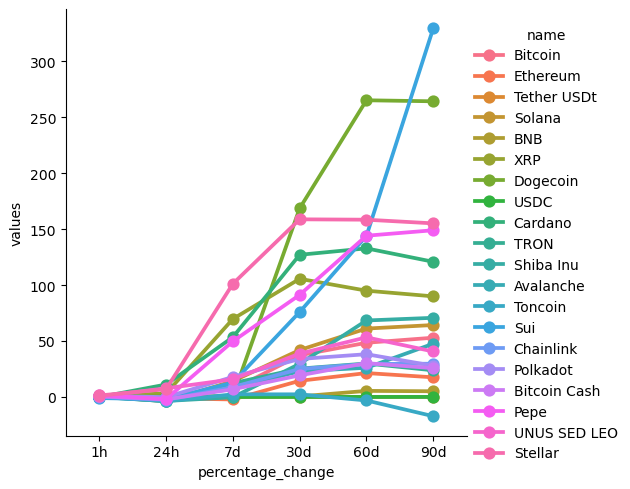

In [51]:
sns.catplot(x='percentage_change', y='values', hue='name', data=df7, kind='point')

In [53]:
df8 = df[['name', 'quote.USD.price']]
df8 = df8.head(4)
df8

,name,quote.USD.price
0,Bitcoin,93623.94816
1,Ethereum,3098.15721
2,Tether USDt,1.00026
3,Solana,236.80778


<Axes: xlabel='name', ylabel='quote.USD.price'>

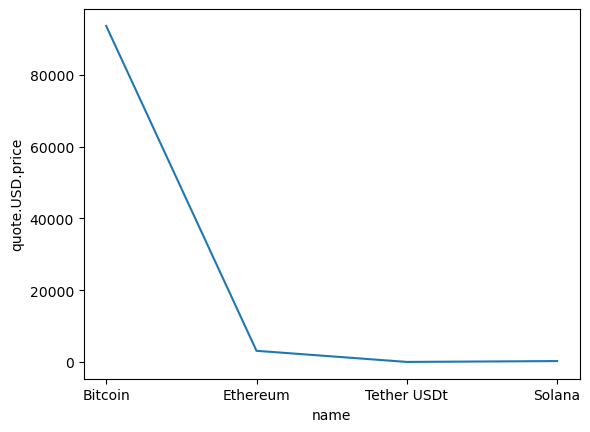

In [55]:
sns.lineplot(x='name', y='quote.USD.price', data=df8)

In [45]:
df9 = df.groupby('name', sort=False)[['max_supply','circulating_supply','total_supply','infinite_supply']].mean()
df9

,max_supply,circulating_supply,total_supply,infinite_supply
name,,,,
Bitcoin,21000000.00000,19784928.00000,19784928.00000,0.00000
Ethereum,NaN,120426315.83473,120426315.83473,1.00000
Tether USDt,NaN,128767132044.39929,130975664152.37340,1.00000
Solana,NaN,474637136.25519,588679819.34353,1.00000
BNB,NaN,144010730.68000,144010730.68000,0.00000
XRP,100000000000.00000,56931242174.00000,99987013354.00000,0.00000
Dogecoin,NaN,146869156383.70520,146869156383.70520,1.00000
USDC,NaN,37531692058.19359,37531692058.19359,0.00000
Cardano,45000000000.00000,35033776787.31020,44995037803.61046,0.00000


In [58]:
df9.count()

max_supply             8
circulating_supply    20
total_supply          20
infinite_supply       20
dtype: int64

In [60]:
pd.Index(range(68))
df9 = df9.reset_index()
df9

,name,max_supply,circulating_supply,total_supply,infinite_supply
0,Bitcoin,21000000.00000,19784928.00000,19784928.00000,0.00000
1,Ethereum,NaN,120426315.83473,120426315.83473,1.00000
2,Tether USDt,NaN,128767132044.39929,130975664152.37340,1.00000
3,Solana,NaN,474637136.25519,588679819.34353,1.00000
4,BNB,NaN,144010730.68000,144010730.68000,0.00000
5,XRP,100000000000.00000,56931242174.00000,99987013354.00000,0.00000
6,Dogecoin,NaN,146869156383.70520,146869156383.70520,1.00000
7,USDC,NaN,37531692058.19359,37531692058.19359,0.00000
8,Cardano,45000000000.00000,35033776787.31020,44995037803.61046,0.00000
9,TRON,NaN,86362121798.25221,86362221863.18379,1.00000


<Axes: >

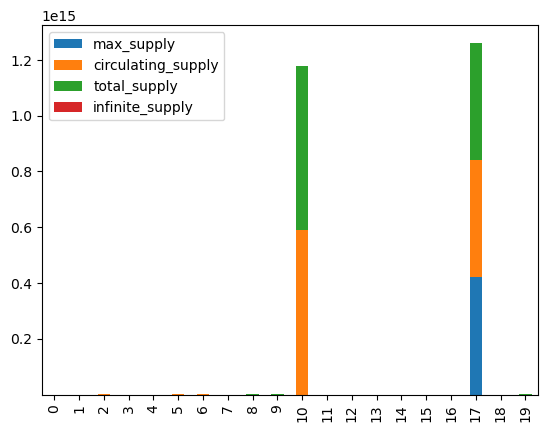

In [84]:
df9.plot(kind = 'bar', stacked = True)

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

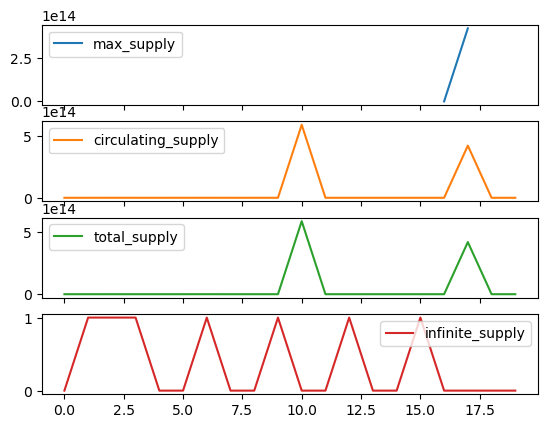

In [86]:
df9.plot(kind = 'line', subplots = True)